(2000, 2)
(2000,)


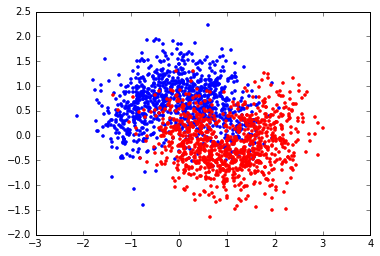

In [14]:
from sklearn import datasets
from polyssifier import Poly
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt 

%matplotlib inline
data, label = make_moons(n_samples=2000, noise=0.4)
print(data.shape)
print(label.shape)

label0 = np.where(label==0)[0]
label1 = np.where(label==1)[0]

plt.plot(data[label0,0], data[label0,1],'.');
plt.plot(data[label1,0], data[label1,1],'r.');

In [16]:
# single class example
%rm -rf _models
pol = Poly(data,label, n_folds=5, verbose=1, feature_selection=False, scoring='f1')
scores= pol.run()


INFO:polyssifier.polyssifier:Building classifiers ...
INFO:polyssifier.polyssifier:Initialization, done.
INFO:polyssifier.polyssifier:Fold 1
INFO:polyssifier.polyssifier:Running Multilayer Perceptron
INFO:polyssifier.polyssifier:Running Nearest Neighbors
INFO:polyssifier.polyssifier:Running SVM
INFO:polyssifier.polyssifier:Running Linear SVM
INFO:polyssifier.polyssifier:Running Voting
INFO:polyssifier.polyssifier:Running Decision Tree
INFO:polyssifier.polyssifier:Running Random Forest
INFO:polyssifier.polyssifier:Running Logistic Regression
INFO:polyssifier.polyssifier:Running Naive Bayes
INFO:polyssifier.polyssifier:Multilayer Perceptron    :  Train 0.87, 16.88 sec
INFO:polyssifier.polyssifier:Decision Tree            :  Train 1.00, 0.03 sec
INFO:polyssifier.polyssifier:Naive Bayes              :  Train 0.83, 0.02 sec
INFO:polyssifier.polyssifier:Nearest Neighbors        :  Train 0.87, 0.83 sec
INFO:polyssifier.polyssifier:SVM                      :  Train 0.87, 2.29 sec
INFO:polyssif

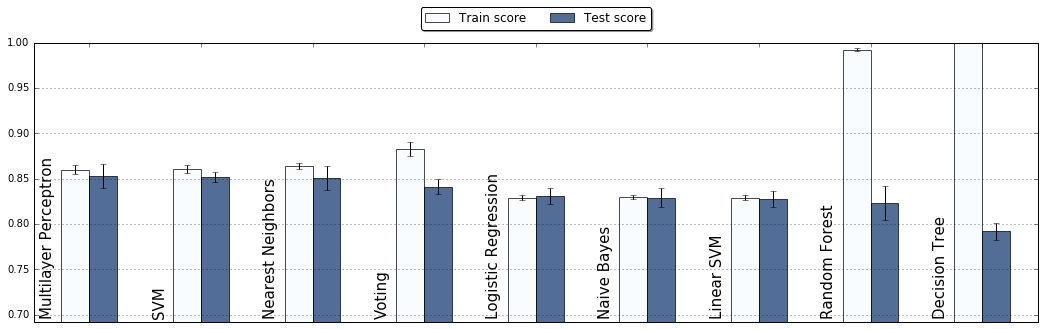

In [17]:
pol.plot()

In [18]:
for key, val in pol.confusions.items():
    print(key)
    print(val)


Random Forest
[[ 831.  169.]
 [ 182.  818.]]
Logistic Regression
[[ 843.  157.]
 [ 178.  822.]]
Nearest Neighbors
[[ 857.  143.]
 [ 153.  847.]]
Voting
[[ 855.  145.]
 [ 169.  831.]]
Decision Tree
[[ 797.  203.]
 [ 211.  789.]]
Naive Bayes
[[ 844.  156.]
 [ 181.  819.]]
Multilayer Perceptron
[[ 852.  148.]
 [ 146.  854.]]
SVM
[[ 839.  161.]
 [ 138.  862.]]
Linear SVM
[[ 839.  161.]
 [ 180.  820.]]


In [19]:
#pol.predictions.head()
pol.predictions.sort_index(inplace=True)

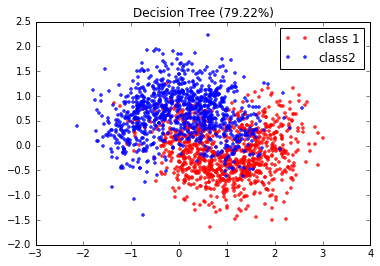

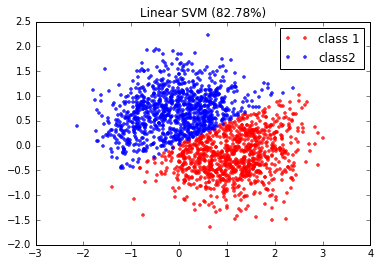

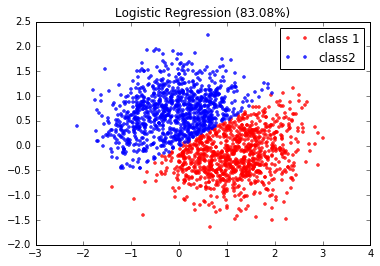

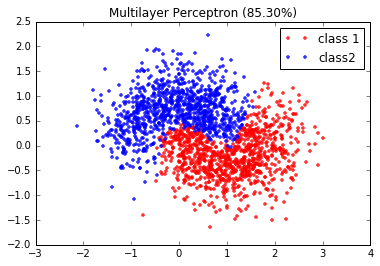

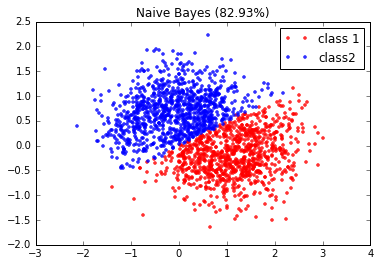

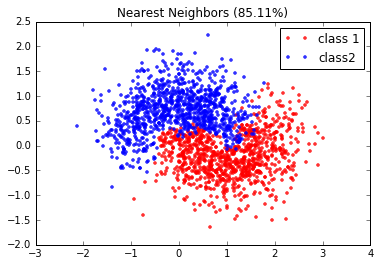

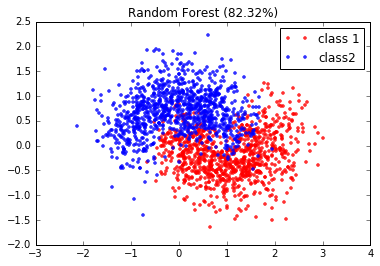

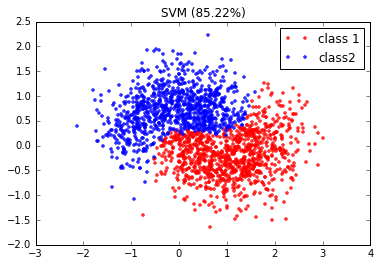

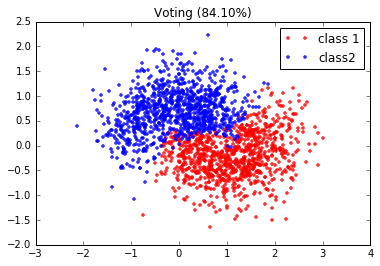

In [20]:
for key, pred in pol.predictions.items():
    plt.figure()
    missclass = np.where(pred==0)[0]
    corrclass = np.where(pred==1)[0]
    plt.plot(data[corrclass,0], data[corrclass,1],'r.', alpha=0.8);
    plt.plot(data[missclass,0], data[missclass,1],'b.', alpha=0.8);
    plt.legend(['class 1', 'class2'])
    plt.title('{0} ({1:.2f}%)'.format(key, 100*np.mean(pol.scores[key]['test']) ))